# Functionalizing HAPI Results
This notebook shows how to easily functionalize the data and meta objects returned by a HAPI call. The simple syntax works both on 1D time series returned by HAPI for multiple variables and for variables of higher dimensionality. The standard SciPy interpolators are applied to the variable datasets by default, or the user can easily supply a custom interpolator for each variable dataset if desired.

## Demonstrate how to functionalize the returns from a HAPI call
### HAPI commands
First, retrieve the data and metadata objects from HAPI. Create the default plots to compare later.

In [1]:
# Copied from a https://hapi-server.org/servers/ example python script
from hapiclient import hapi
server     = 'http://planet.physics.uiowa.edu/das/das2Server/hapi'
dataset    = 'Cassini/RPWS/Survey_KeyParam,B'
parameters = 'magnetic_specdens'
start      = '2011-03-27T00:18:00Z'
stop       = '2011-03-28T00:00:00.000Z'
data, meta = hapi(server, dataset, parameters, start, stop)

heatmap() warning: Only bin centers given for y and bin separation distance is not constant. Bin width assumed based on separation distance and data pickers will not work properly.


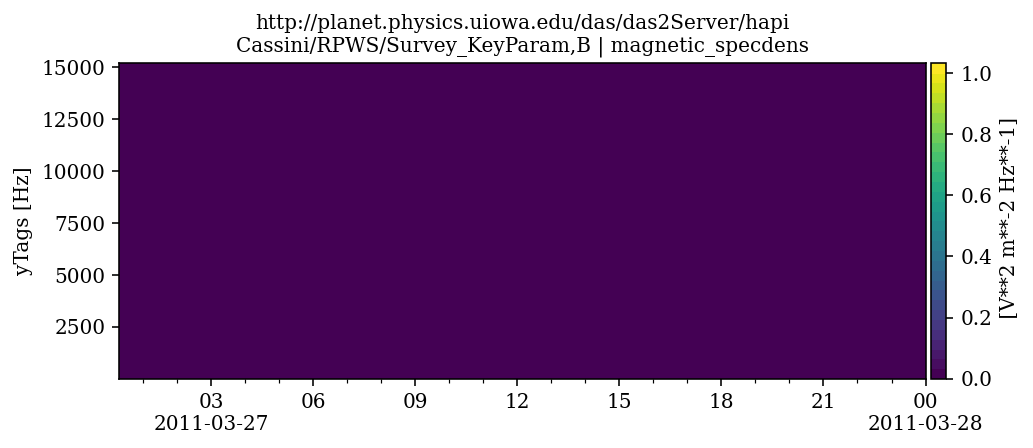

{'HAPI': '1.1',
 'contact': 'Chris Piker <chris-piker@uiowa.edu>',
 'description': 'Survey Mode Magnetic Spectral Densities',
 'format': 'csv',
 'parameters': [{'fill': None,
   'name': 'time',
   'type': 'isotime',
   'units': 'UTC'},
  {'bins': [{'centers': [1.0,
      1.26,
      1.58,
      2.0,
      2.51,
      3.16,
      3.98,
      5.01,
      6.31,
      7.94,
      10.0,
      12.6,
      15.8,
      19.9,
      25.1,
      31.6,
      39.8,
      50.1,
      63.1,
      79.4,
      100.0,
      126.0,
      158.0,
      200.0,
      251.0,
      316.0,
      398.0,
      501.0,
      631.0,
      794.0,
      1000.0,
      1260.0,
      1580.0,
      2000.0,
      2510.0,
      3160.0,
      3980.0,
      5010.0,
      6310.0,
      7940.0,
      10000.0,
      12600.0],
     'description': 'Frequency (Hz)',
     'name': 'yTags',
     'units': 'Hz'}],
   'description': 'Spectral Density (nT!a2!n Hz!a-1!n)',
   'fill': None,
   'name': 'magnetic_specdens',
   'size': [42],
 

In [2]:
# import os
# print(os.popen('pip install hapiplot --upgrade').read())
from hapiplot import hapiplot
hapiplot(data, meta)

### Functionalize HAPI Outputs with Kamodo
Next, functionalize the HAPI outputs with a single command. 

In [3]:
from kamodo_ccmc.tools.functionalize_hapi import functionalize_hapi, varlist
kamodo_object = functionalize_hapi(data, meta)
kamodo_object

{magnetic_specdens(UTC_time, yTags): <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC7357318>, magnetic_specdens: <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC7357318>}

Print the list of variable names functionalized to reference later.

In [4]:
var_list = varlist(meta)
print(var_list)

['magnetic_specdens']


Notice that the HAPI version of the spectral density does not show much. This is because the data needs to be plotted with a logscale. This is easily accomplished in Kamodo, both for 2D and 1D plots. The Kamodo plots are interactive in the tutorial version of the notebook when executed. This interactive quality can be saved for future interaction. See the Quick Start section of the documentation for an example.

```py
from kamodo_ccmc.tools.plotfunctions import toColor, toLog10
toLog10(toColor(kamodo_object.plot(var_list[0]), colorscale="Viridis"))
```
![Screenshot](Files/functionalizeHAPI_magspec_1.png)

1D slices through this dataset can also easily be plotted with the plot_partial keyword. The y axis can be easily changed to be logscale by adding the appropriate PlotLy attribute syntax.
```py
kamodo_object.plot(var_list[0], plot_partial={var_list[0]: {'UTC_time': 1.301251e9}}
                  ).update_yaxes(type="log")  # Add .update_xaxes(type="log") to change to log-log
```
![Screenshot](Files/functionalizeHAPI_magspec_2.png)

### Interpolation with Kamodo
Kamodo also enables easy interpolation. This is an important feature for comparing datasets on different time grids and with different temporal (and spatial) resolutions.  

The next block demonstrates how to perform interpolation for a single time value in the range of the dataset. Then, an interpolation onto a finer time grid is demonstrated in the second block below, followed by an interpolation onto a regular frequency grid of the same range of the dataset at a single time value in the third block. Finally, an interpolation onto new time and frequency grids concludes the section.  

There is more than one coordinate for this function, so the coordinates must be named in the interpolation calls below. If a value or values are not given for a particular coordinate, then the default coordinate grid for each unspecified coordinate is used for the interpolation. See the examples below for more details.

In [7]:
# Create a utc timestamp in the date range of the dataset retrieved.
from datetime import datetime, timezone
sample_datetime = datetime(2011, 3, 27, 23, 50, tzinfo=timezone.utc).timestamp()
print('Sample timestamp: ', sample_datetime)
# Interpolate the frequency spectrum for that date-time.
# Notice that the default frequency grid is used for the interpolation.
kamodo_object[var_list[0]](UTC_time=sample_datetime)

Sample timestamp:  1301269800.0


array([3.08950e-03, 1.68885e-03, 2.42350e-04, 4.21800e-05, 4.75200e-05,
       1.43100e-05, 9.71350e-06, 3.24800e-06, 1.87550e-05, 2.13650e-05,
       8.41600e-07, 8.34050e-06, 8.71600e-06, 1.27300e-06, 1.45900e-06,
       9.63150e-07, 1.84100e-07, 1.25100e-07, 9.57650e-07, 8.09200e-08,
       5.50150e-08, 1.28000e-07, 2.00450e-08, 5.70250e-09, 1.51020e-08,
       1.92030e-08, 3.11800e-09, 1.73350e-08, 1.70900e-09, 3.40400e-09,
       2.75850e-09, 1.94200e-09, 3.68700e-09, 2.26150e-09, 1.46400e-09,
       1.54750e-09, 1.39050e-09, 1.77850e-09, 2.08650e-09, 2.43500e-09,
       3.89200e-09, 3.93200e-09])

In [8]:
# Create a time grid covering 1 hour with a 15 minute resolution
from numpy import linspace
time_grid = linspace(sample_datetime, sample_datetime+3600, 4, endpoint=True)
# Interpolate the frequency spectrum for each time in the grid.
# Notice that the default frequency grid is used for the interpolation.
kamodo_object[var_list[0]](UTC_time=time_grid)

array([[3.089500e-03, 2.612675e-01, 3.846000e-03, 1.261000e-03],
       [1.688850e-03, 6.180000e-04, 4.384500e-04, 2.969500e-04],
       [2.423500e-04, 9.793000e-05, 7.875500e-05, 3.793000e-05],
       [4.218000e-05, 3.570325e-03, 1.932000e-05, 6.850000e-05],
       [4.752000e-05, 3.334500e-05, 3.908500e-05, 9.115000e-06],
       [1.431000e-05, 1.513950e-05, 3.181500e-06, 3.762500e-06],
       [9.713500e-06, 1.020950e-05, 3.594000e-06, 1.166000e-06],
       [3.248000e-06, 3.746000e-06, 2.679000e-06, 2.206000e-07],
       [1.875500e-05, 2.082500e-05, 1.651500e-05, 4.389000e-06],
       [2.136500e-05, 2.411500e-05, 2.087000e-05, 8.855000e-06],
       [8.416000e-07, 1.629500e-06, 7.487500e-07, 8.105000e-07],
       [8.340500e-06, 9.282500e-06, 9.917000e-06, 5.330000e-06],
       [8.716000e-06, 7.696500e-06, 6.957500e-06, 2.932000e-06],
       [1.273000e-06, 1.411500e-06, 1.225000e-06, 5.825000e-07],
       [1.459000e-06, 1.747000e-06, 1.612500e-06, 8.095000e-07],
       [9.631500e-07, 1.1

In [9]:
# Create a new frequency grid with the same range as the data
# First, retrieve the coordinate grid and determine the frequency range.
from kamodo import get_defaults
defaults = get_defaults(kamodo_object[var_list[0]])
# The coordinates are returned in a python dictionary with the
# coordinate names as keys.
print(defaults)
print(defaults['yTags'].min(), defaults['yTags'].max())

{'UTC_time': array([1.30119951e+09, 1.30119957e+09, 1.30119963e+09, ...,
       1.30128465e+09, 1.30128471e+09, 1.30128477e+09]), 'yTags': array([1.00e+00, 1.26e+00, 1.58e+00, 2.00e+00, 2.51e+00, 3.16e+00,
       3.98e+00, 5.01e+00, 6.31e+00, 7.94e+00, 1.00e+01, 1.26e+01,
       1.58e+01, 1.99e+01, 2.51e+01, 3.16e+01, 3.98e+01, 5.01e+01,
       6.31e+01, 7.94e+01, 1.00e+02, 1.26e+02, 1.58e+02, 2.00e+02,
       2.51e+02, 3.16e+02, 3.98e+02, 5.01e+02, 6.31e+02, 7.94e+02,
       1.00e+03, 1.26e+03, 1.58e+03, 2.00e+03, 2.51e+03, 3.16e+03,
       3.98e+03, 5.01e+03, 6.31e+03, 7.94e+03, 1.00e+04, 1.26e+04])}
1.0 12600.0


In [10]:
# Then, create a new frequency grid and interpolate the data onto the
# new grid for a single timestamp.
freq_grid = linspace(defaults['yTags'].min(), defaults['yTags'].max(), 10, endpoint=True)
kamodo_object[var_list[0]](UTC_time=sample_datetime, yTags=freq_grid)

array([3.08950000e-03, 2.71028472e-09, 1.50135376e-09, 1.47362492e-09,
       1.91841624e-09, 2.23411956e-09, 2.76058528e-09, 3.75070086e-09,
       3.91046325e-09, 3.93200000e-09])

In [11]:
# Demonstrate interpolation onto a time grid and a frequency grid simultaneously.
# The result is a bit large to print, so only the shape and a sample are printed.
data = kamodo_object[var_list[0]](UTC_time=time_grid, yTags=freq_grid).T
data.shape, data[0]

((4, 10),
 array([3.08950000e-03, 2.71028472e-09, 1.50135376e-09, 1.47362492e-09,
        1.91841624e-09, 2.23411956e-09, 2.76058528e-09, 3.75070086e-09,
        3.91046325e-09, 3.93200000e-09]))

In [12]:
# Interpolate for new grids of times and frequencies:
time_grid = linspace(defaults['UTC_time'][0], defaults['UTC_time'][100], 1000, endpoint=True)
data = kamodo_object[var_list[0]](UTC_time=time_grid, yTags=freq_grid).T
data.shape, data[0]

((1000, 10),
 array([4.03500000e-03, 2.15904306e-09, 1.32031590e-09, 1.48926861e-09,
        1.85222949e-09, 2.07073511e-09, 2.51681456e-09, 3.32820647e-09,
        3.75695205e-09, 4.12200000e-09]))

## Including a custom interpolator
The above section described how to functionalize and then interact with the given data and meta objects returned by HAPI. The method shown used Kamodo's standard interpolation methods behind the scenes (SciPy's interp1d for 1D data and SciPy's RegularGridInterpolator for multi-dimensional data). Now, this notebook demonstrates how to functionalize a given dataset when a custom interpolation method is required. In this case, a pair of 1D variables is used in the demonstration, but the same logic applies for higher dimensions.

The first block of code below retrieves the data and meta objects from HAPI. These objects are then used to generate the default plots (second block), functionalize the data (third block), and generate the interactive plots possible through Kamodo (fourth block). Then, two examples are given demonstrating how to include a custom interpolator in the functionalization process.  

### HAPI Call for Multiple Variables
Retrieve two 1D variables from HAPI and generate the plots for later comparison.

In [13]:
# Copied from https://hapi-server.org/servers/#server=SSCWeb&dataset=aee&parameters=X_GEO&start=1975-11-20T21:04:00.000Z&stop=1975-11-22T21:04:00.000Z&return=script&format=python
from hapiclient import hapi
server1     = 'https://iswa.gsfc.nasa.gov/IswaSystemWebApp/hapi'  # 1D example
dataset1    = 'ENLIL_KP_P7M'
parameters1 = 'KP_18,KP_90'  # A comma-separated list of variable names
start1      = '2011-03-27T00:03:00Z'
stop1       = '2011-03-29T00:03:00.000Z'
data1, meta1 = hapi(server1, dataset1, parameters1, start1, stop1)

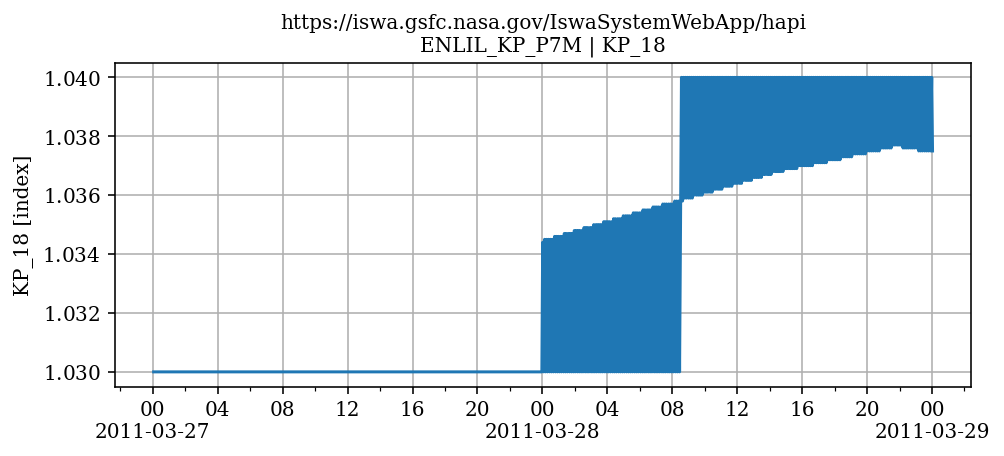

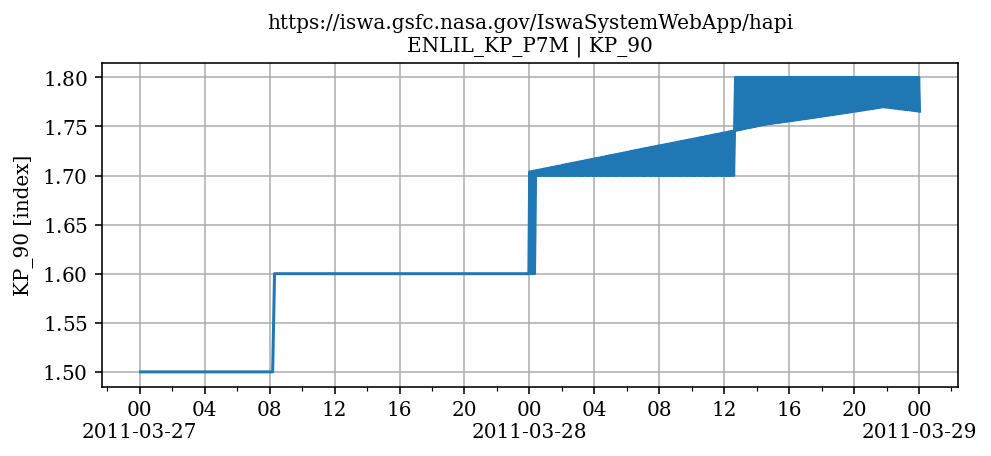

{'HAPI': '2.0',
 'parameters': [{'fill': None,
   'length': 22,
   'name': 'Time',
   'type': 'isotime',
   'units': 'UTC'},
  {'fill': 0,
   'name': 'KP_18',
   'type': 'double',
   'units': 'index',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}},
  {'fill': 0,
   'name': 'KP_90',
   'type': 'double',
   'units': 'index',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}}],
 'startDate': '2011-03-27T00:03:00Z',
 'status': {'code': 1200, 'message': 'OK'},
 'stopDate': '2015-01-09T00:02:00Z',
 'x_server': 'https://iswa.gsfc.nasa.gov/IswaSystemWebApp/hapi',
 'x_dataset': 'ENLIL_KP_P7M',
 'x_parameters': 'KP_18,KP_90',
 'x_time.min': '2011-03-27T00:03:00Z',
 'x_time.max': '2011-03-29T00:03:00.000Z',
 'x_requestDate': '2023-03-22T12:00:26',
 'x_cacheDir': 'C:\\Users\\rringuet\\AppData\\Local\\Temp\\1\\hapi-data\\iswa.gsfc.nasa.gov_IswaSystemWebApp_hapi',
 'x_downloadTime': 0.3328664302825928,
 'x_readTime': 0.0,
 'x_metaFileParsed': 'C:\\Users\\rringuet\\AppData

In [14]:
hapiplot(data1, meta1)

### Functionalize HAPI Outputs with Kamodo
Next, functionalize the HAPI outputs with a single command. The next block also retrieves a list of the variable names for easy reference. The typical Kamodo plots are generated for comparison and are interactive in the tutorial version of this notebook when the notebook is live. Notice that the default SciPy interpolator for 1D variables (interp1d) is used.

In [15]:
kamodo_object1 = functionalize_hapi(data1, meta1)
var_list1 = varlist(meta1)
kamodo_object1

{KP_18(UTC_time): <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC91E3AF8>, KP_18: <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC91E3AF8>, KP_90(UTC_time): <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC92443A8>, KP_90: <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC92443A8>}

Plot the data in Kamodo.
```py
kamodo_object1.plot(*var_list1)
```
![Screenshot](Files/functionalizeHAPI_KP1.png)

### Function Documentation

In [17]:
help(functionalize_hapi)

Help on function functionalize_hapi in module kamodo_ccmc.tools.functionalize_hapi:

functionalize_hapi(data, meta, custom_interp=None, coord_str='')
    Functionalizes the data found in the data object given.
    Inputs:
        data: data object returned by HAPI
        meta: meta object returned by HAPI
        custom_interp: a custom interpolator with the same execution syntax as
            SciPy's interp1d and RegularGridInterpolator functions. If a list
            is given, the interpolators should be given in the same order as
            in the meta object. Default is None.
        custom_interp: a custom interpolator with the same execution syntax as
            SciPy's interp1d and RegularGridInterpolator functions. If a list
            is given, the interpolators should be given in the same order as
            in the meta object. The command
            ```py
            interp = custom_interp(coord_dict, var_dict)
            ```
            must initialize the interpol

A custom interpolator can easily be included in the call to functionalize_hapi. See the documentation for the function below. If all of the variables share the same coordinate dependencies, and the same custom interpolation method is desired for each, then functionalize_hapi can be used as shown in the first subsection below. Otherwise, the interpolators should be arranged into a list in the same order as the parameters are in the meta object (second subsection below). If desired, a custom interpolator can be easily assigned to only a subset of the variables and the default interpolator(s) used for the remaining variables (see the third subsection). Care should be taken to place the interpolators in the correct order to ensure that the desired interpolators are assigned to the correct variables. Otherwise, some surprising interpolation results may occur. If the variables are of different dimensions, this error will break the code.

### A Single Custom Interpolator for All Variables

In [18]:
from scipy.interpolate import interp1d as RGI
from numpy import NaN
# The custom 1D interpolator needs to be created in a separate function to avoid overwriting
# and to enable initialization with the required inputs. See documentation above for details.
def create_custominterp(coord_dict, var_dict):
    coord_list = [value['data'] for key, value in coord_dict.items()]
    var_name = list(var_dict.keys())[0]
    rgi = RGI(*coord_list, var_dict[var_name]['data'], bounds_error=False,
              fill_value=NaN, kind='nearest')  # e.g. 'cubic'
    def interp(xvec):
        return rgi(xvec)
    return interp

kamodo_object_custom = functionalize_hapi(data1, meta1, custom_interp=create_custominterp)
kamodo_object_custom

{KP_18(UTC_time): <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC9210DC8>, KP_18: <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC9210DC8>, KP_90(UTC_time): <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC92A8168>, KP_90: <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC92A8168>}

### Different Custom Interpolators for Each Variable

In [19]:
# Demonstrate how to use a unique custom interpolator for two 1D variables.
# Define first custom interpolator for KP_18
def create_custominterp1(coord_dict, var_dict):
    coord_list = [value['data'] for key, value in coord_dict.items()]
    var_name = list(var_dict.keys())[0]
    rgi = RGI(*coord_list, var_dict[var_name]['data'], bounds_error=False,
              fill_value=NaN, kind='cubic')  # e.g. 'cubic'
    def interp(xvec):
        return rgi(xvec)
    return interp

# Define second custom interpolator for KP_90
def create_custominterp2(coord_dict, var_dict):
    coord_list = [value['data'] for key, value in coord_dict.items()]
    var_name = list(var_dict.keys())[0]
    rgi = RGI(*coord_list, var_dict[var_name]['data'], bounds_error=False,
              fill_value=NaN, kind='slinear')  # e.g. 'cubic'
    def interp(xvec):
        return rgi(xvec)
    return interp

# Put custom interpolators into a list in the same order as the variables in meta.
interp_list = [create_custominterp1, create_custominterp2]
# Functionalize!
kamodo_object_custom2 = functionalize_hapi(data1, meta1, custom_interp=interp_list)
kamodo_object_custom2

{KP_18(UTC_time): <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC8B9C678>, KP_18: <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC8B9C678>, KP_90(UTC_time): <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC8B32B88>, KP_90: <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC8B32B88>}

### Using Custom and Default Interpolators

In [20]:
# Demonstrate partial assignment of interpolators
kamodo_object_custom3 = functionalize_hapi(data1, meta1, custom_interp=[interp_list[1], None])
kamodo_object_custom3

{KP_18(UTC_time): <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC92A8DC8>, KP_18: <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC92A8DC8>, KP_90(UTC_time): <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC8BEC558>, KP_90: <function gridify.<locals>.decorator_gridify.<locals>.wrapped at 0x0000027BC8BEC558>}

### Comparing Interpolation Results

An easy way to test that the different interpolation methods have been correctly applied is to compare results for the same variables that have been functionalized with different interpolation methods. The block below prints out the interpolation results for the two KP variables functionalized in the three methods. The only two results that should be the same are the first and last interpolation results for the KP_90 variable since the default interpolation method was used for both. Notice that the other interpolation results are unique for the same date and time, which confirms that the interpolation methods are different.  

In [21]:
# Demonstrate interpolation with a time between the start and stop dates
# Note that the result from the standard and custom interpolators for each variable are different!
# This means that the methods shown worked correctly.
sample_datetime1 = datetime(2011, 3, 28, 14, 50, tzinfo=timezone.utc).timestamp()
print('Sample timestamp: ', sample_datetime1)
for var in var_list1:
    print(var+': ',
          kamodo_object1[var](sample_datetime1),
          kamodo_object_custom[var](sample_datetime1),
          kamodo_object_custom2[var](sample_datetime1),
          kamodo_object_custom3[var](sample_datetime1))

Sample timestamp:  1301323800.0
KP_18:  1.03715 1.0362 1.0367223678865103 1.03715
KP_90:  1.729625 1.7395 1.7296250000000002 1.729625
